# Decision Trees

## A cloth manufacturing company is interested to know about the segment or attributes causes high sale

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

## Importing the Data

In [ ]:
company_data = pd.read_csv('/content/Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding

In [ ]:
company_data.shape

(400, 11)

In [ ]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
company_data['ShelveLoc'] = company_data['ShelveLoc'].astype('category')
company_data['Urban'] = company_data['Urban'].astype('category')
company_data['US'] = company_data['US'].astype('category')

In [ ]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
print(company_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool


In [ ]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [ ]:
company_data['High'] = company_data['Sales'].map(lambda x: 1 if x>8 else 0)
company_data['ShelveLoc'] = company_data['ShelveLoc'].cat.codes
company_data['Urban'] = company_data['Urban'].cat.codes
company_data['US'] = company_data['US'].cat.codes
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


## Data Preparation

In [ ]:
X=company_data.iloc[:,1:11]
y=company_data['High']
print(X)
print(y)

     CompPrice  Income  Advertising  Population  ...  Age  Education  Urban  US
0          138      73           11         276  ...   42         17      1   1
1          111      48           16         260  ...   65         10      1   1
2          113      35           10         269  ...   59         12      1   1
3          117     100            4         466  ...   55         14      1   1
4          141      64            3         340  ...   38         13      1   0
..         ...     ...          ...         ...  ...  ...        ...    ...  ..
395        138     108           17         203  ...   33         14      1   1
396        139      23            3          37  ...   55         11      0   1
397        162      26           12         368  ...   40         18      1   1
398        100      79            7         284  ...   50         12      1   1
399        134      37            0          27  ...   49         16      1   1

[400 rows x 10 columns]
0      1
1     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 10), (80, 10), (320,), (80,))

## Model Builing

In [ ]:
dt_model=DecisionTreeClassifier()

## Finding out the best hyperparameter for building the Tree


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator = dt_model, param_grid = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12]} , cv= 5)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [ ]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [ ]:
grid_search.best_score_

0.76

## Model Training

In [ ]:
dt_model=DecisionTreeClassifier(criterion='entropy' , max_depth=11)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

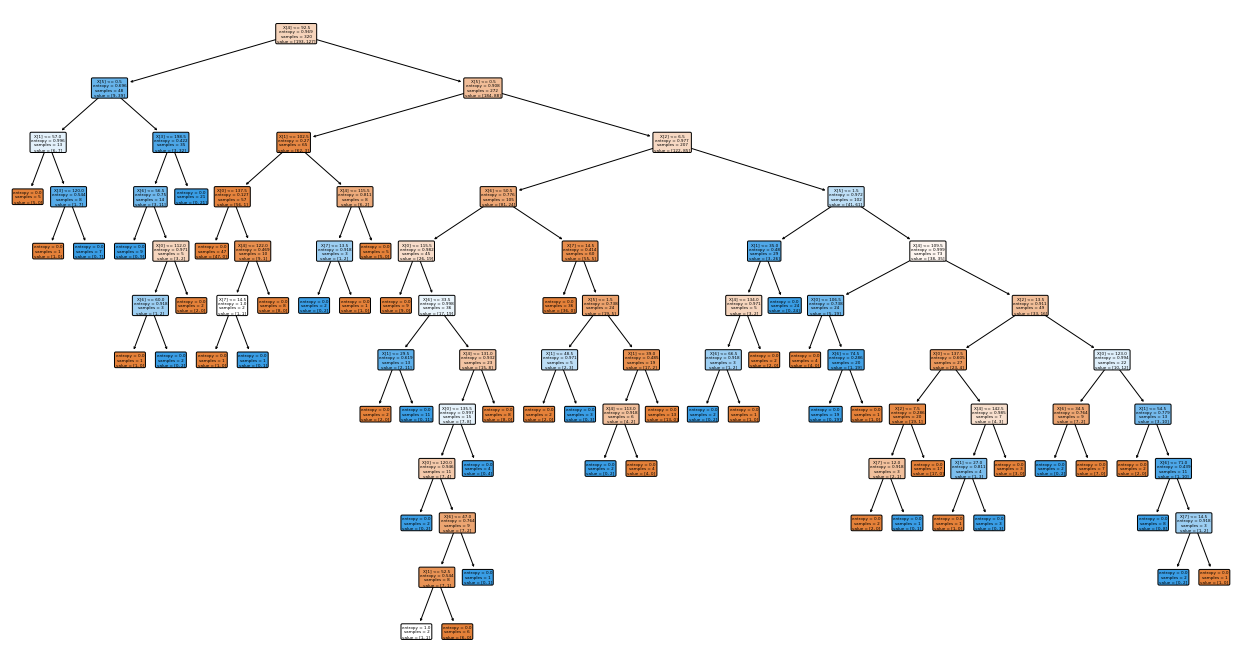

In [ ]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

## Model Testing

In [ ]:
y_pred_train = dt_model.predict(X_train)

In [ ]:
y_pred_test = dt_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [ ]:
accuracy_score(y_train,y_pred_train)

0.996875

In [ ]:
confusion_matrix(y_train,y_pred_train)

array([[193,   0],
       [  1, 126]])

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      0.99      1.00       127

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
accuracy_score(y_test,y_pred_test)

0.75

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[37,  6],
       [14, 23]])

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        43
           1       0.79      0.62      0.70        37

    accuracy                           0.75        80
   macro avg       0.76      0.74      0.74        80
weighted avg       0.76      0.75      0.75        80



# Model Improvement 1

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

## Model Builing and Model Training

In [ ]:
ad_model = AdaBoostClassifier()

In [ ]:
ad_model.fit(X_train,y_train)

AdaBoostClassifier()

## Model Testing

In [ ]:
y_pred_train_d1 = ad_model.predict(X_train)

In [ ]:
y_pred_test_d1 = ad_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [ ]:
accuracy_score(y_train,y_pred_train_d1)

0.95625

In [ ]:
confusion_matrix(y_train,y_pred_train_d1)

array([[188,   5],
       [  9, 118]])

In [ ]:
print(classification_report(y_train,y_pred_train_d1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       193
           1       0.96      0.93      0.94       127

    accuracy                           0.96       320
   macro avg       0.96      0.95      0.95       320
weighted avg       0.96      0.96      0.96       320



In [ ]:
accuracy_score(y_test,y_pred_test_d1)

0.8625

In [ ]:
confusion_matrix(y_test,y_pred_test_d1)

array([[38,  5],
       [ 6, 31]])

In [ ]:
print(classification_report(y_test,y_pred_test_d1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.86      0.84      0.85        37

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



# Model Improvement 2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

## Model Builing and Model Training

In [ ]:
gr_model =GradientBoostingClassifier()

In [ ]:
gr_model.fit(X_train,y_train)

GradientBoostingClassifier()

## Model Testing

In [ ]:
y_pred_train_d2 = gr_model.predict(X_train)

In [ ]:
y_pred_test_d2 = gr_model.predict(X_test)

## Model Evaluation

## Confusion_Matrix :- To know the Misclassification done by the model

In [ ]:
accuracy_score(y_train,y_pred_train_d2)

1.0

In [ ]:
confusion_matrix(y_train,y_pred_train_d2)

array([[193,   0],
       [  0, 127]])

In [ ]:
print(classification_report(y_train,y_pred_train_d2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       127

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
accuracy_score(y_test,y_pred_test_d2)

0.8125

In [ ]:
confusion_matrix(y_test,y_pred_test_d2)

array([[39,  4],
       [11, 26]])

In [ ]:
print(classification_report(y_test,y_pred_test_d2))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        43
           1       0.87      0.70      0.78        37

    accuracy                           0.81        80
   macro avg       0.82      0.80      0.81        80
weighted avg       0.82      0.81      0.81        80



## Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(ad_model, open('Decision_Trees(Company_data)','wb'))

In [ ]:
from pickle import load

In [ ]:
ad_model = load(open('/content/Decision_Trees(Company_data)','rb'))

In [ ]:
ad_model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

## Model Done with AdaBoostClassifier is having Accracy score of 86.25%
## In classification_report It shows that model with AdaBoostClassifier having Better score in precision and f1-score compaired with GradientBoosting.